# Explatory Analysis for Low-Income Housing Tax Credit Housing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import requests

pd.options.mode.chained_assignment = None

%matplotlib inline

import time

#maybe use twilio to send me a text when its finished?

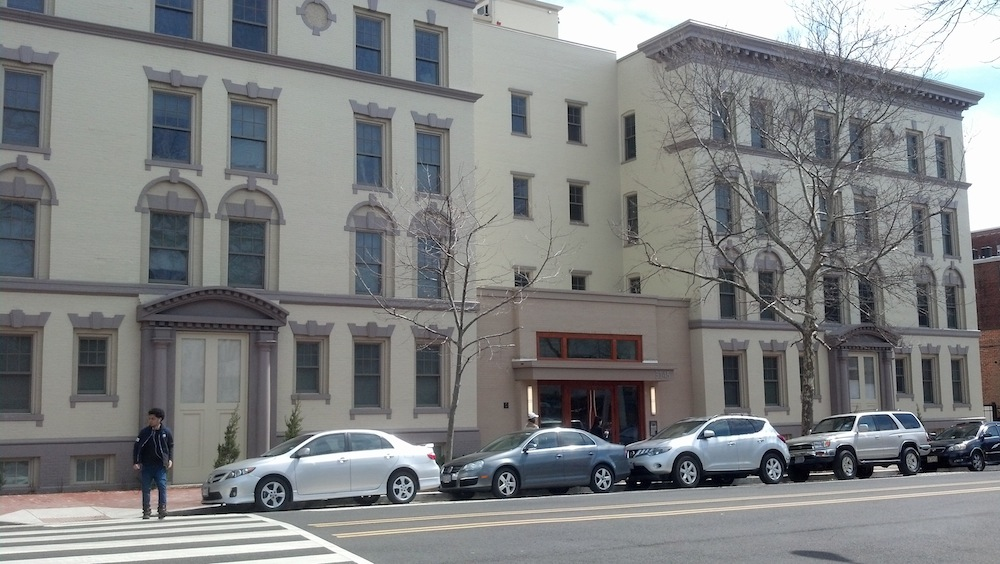

Mosenor Romero Apartments in Mt Pleasant, Washington DC. A LIHTC Projects


In [2]:
from IPython.core.display import Image, display
display(Image('http://cdnassets.hw.net/f0/b4/b8562ba64016b53fb039a5e367f3/monsenor-romero-2.jpg', width=500, unconfined=True))
print "Mosenor Romero Apartments in Mt Pleasant, Washington DC. A LIHTC Projects"

In [3]:
#data dictionary is the PDF in the workfolder.

In [4]:
df = pd.read_csv("LIHTC_Properties_wGeocode.csv", low_memory=False)
print "There are " + str(len(df)) + " properties in the database."

There are 38365 properties in the database.


In [5]:
#not every variable is useful. but a lot are!
variablelist= list(df)
print variablelist

['FID', 'OBJECTID', 'HUD_ID', 'PROJECT', 'PROJ_ADD', 'PROJ_CTY', 'PROJ_ST', 'PROJ_ZIP', 'STATE_ID', 'CONTACT', 'COMPANY', 'CO_ADD', 'CO_CTY', 'CO_ST', 'CO_ZIP', 'CO_TEL', 'ALLOCAMT', 'N_UNITS', 'LI_UNITS', 'N_0BR', 'N_1BR', 'N_2BR', 'N_3BR', 'N_4BR', 'INC_CEIL', 'LOW_CEIL', 'CEILUNIT', 'YR_PIS', 'YR_ALLOC', 'NON_PROF', 'BASIS', 'BOND', 'MFF_RA', 'MFF_RA_ID', 'FMHA_514', 'RDNUM_514', 'FMHA_515', 'RDNUM_515', 'FMHA_538', 'RDNUM_538', 'HOME', 'HOME_AMT', 'HOME_IDISI', 'TCAP', 'TCAP_AMT', 'TCAP_IDISI', 'CDBG', 'CDBG_AMT', 'CDBG_IDISI', 'FHA', 'FHA_NUM', 'HOPEVI', 'HPVI_AMT', 'TCEP', 'TCEP_AMT', 'RENTASSIST', 'TRGT_POP', 'TRGT_FAM', 'TRGT_ELD', 'TRGT_DIS', 'TRGT_HML', 'TRGT_OTHER', 'TRGT_SPC', 'TYPE', 'CREDIT', 'N_UNITSR', 'LI_UNITR', 'DDA', 'QCT', 'NONPROG', 'DATANOTE', 'METRO_TRAC', 'STATE2KX', 'CNTY_NM2KX', 'CNTY2KX', 'TRACT2KX', 'BG2KX', 'BLOCK2KX', 'CURCNTY_NM', 'CURCNTY', 'CURCOSUB', 'CURCOSUB_N', 'PLACE2KX', 'PLACE_NM2K', 'PLACE_CC2K', 'PLACE_INC2', 'MSA_NM', 'CBSA_NM', 'NECTA', 'NEC

In [6]:
#since the ACS starts in 2006, I want to cut down my data set. I know I could do a range to do the years below, but I wanted to be able to quickly insert.
df_tiny =  df[(df.YR_PIS == 2006)|(df.YR_PIS == 2007)|(df.YR_PIS == 2008)|(df.YR_PIS == 2009)|(df.YR_PIS == 2010) | (df.YR_PIS == 2011)|(df.YR_PIS == 2012)|(df.YR_PIS == 2013)|(df.YR_PIS == 2014)|(df.YR_PIS == 2015)]
print "The df_tiny has " + str(len(df_tiny)) + " properties in the database. It's not that tiny, despite it being called df_tiny.."
df_tiny.head(10)

The df_tiny has 10454 properties in the database. It's not that tiny, despite it being called df_tiny..


,FID,OBJECTID,HUD_ID,PROJECT,PROJ_ADD,PROJ_CTY,PROJ_ST,PROJ_ZIP,STATE_ID,CONTACT,...,STM2KX,LVL2KX,UR,MSG2KX,COUNTY_LEV,PLACE_LEVE,TRACT_LEVE,BLKGRP_LEV,MSA,CBSA
0,0,5001,CAA2010235,ROSA PARKS VILLAS,2507 S BRONSON AVE,LOS ANGELES,CA,90018,CA-07-009,J DUPONT-WALKER,...,,R,U,** Street-Level Rooftop **,6037,0644000,6037218702,60372187021,4480,31084
1,1,5002,CAA2011484,CUATRO VIENTOS,5331 HUNTINGTON DR N,LOS ANGELES,CA,90032,CA-09-205,JACQUELINE MONTERROSAS,...,,R,U,** Street-Level Rooftop **,6037,0644000,6037201120,60372011201,4480,31084
2,2,5003,CAA2011485,VILLAGE AT BROAD STREET,2260 EMILY ST,SAN LUIS OBISPO,CA,93401,CA-09-124,JONATHAN EMAMI,...,,R,U,** Street-Level Rooftop **,6079,0668154,6079011102,60790111024,7460,42020
3,3,5004,CAA2011486,CYNARA COURT,10868 MERRITT ST,CASTROVILLE,CA,95012,CA-10-818,MATTHEW FRANKLIN,...,,R,U,** Street-Level Rooftop **,6053,0611978,6053010400,60530104002,7120,41500
4,4,5005,CAA2011490,TOUSSIN SENIOR APRTMENTS,10 TOUSSIN AVE,KENTFIELD,CA,94904,CA-09-198,MARY STOMPE,...,,R,U,** Street-Level Rooftop **,6041,0638114,6041119100,60411191002,7360,42034
5,5,5006,CAA2011492,TREE HOUSE APTS,488 W CHARLESTON RD,PALO ALTO,CA,94306,CA-10-025,CANDICE GONZALEZ,...,,R,U,** Street-Level Rooftop **,6085,0655282,6085510700,60855107003,7400,41940
6,6,5007,CAA2011495,TRESOR APTS,1041 BUCKHORN DR,SALINAS,CA,93905,CA-09-233,CALEB ROOPE,...,,R,U,** Street-Level Rooftop **,6053,0664224,6053010605,60530106051,7120,41500
7,7,5008,CAA2012879,LAS BRISAS,2001 N EIGHTH ST,EL CENTRO,CA,92243,CA-11-843,LARRY CORTES,...,,R,U,** Street-Level Rooftop **,6025,0621782,6025011201,60250112012,9999,20940
8,8,5009,CAA2012880,VINTAGE AT LAGUNA SENIOR APTS II,9204 BIG HORN BLVD,ELK GROVE,CA,95758,CA-11-841,KENNETH ROBERTSON,...,,R,U,** Street-Level Rooftop **,6067,0622020,6067009639,60670096393,6920,40900
9,9,5010,CAA2012881,PRESIDIO EL CAMINO APTS,1490 EL CAMINO REAL,SANTA CLARA,CA,95050,CA-11-839,CHRIS NEALE,...,,R,U,** Street-Level Rooftop **,6085,0669084,6085505600,60855056001,7400,41940


,FID
YR_PIS,
2006,1538
2007,1539
2008,1304
2009,1055
2010,1025
2011,1328
2012,1136
2013,928
2014,558


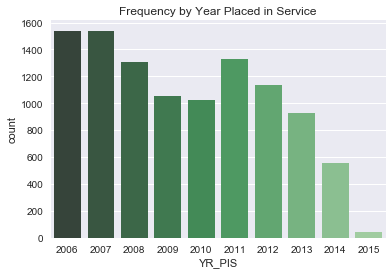

In [7]:
#initially i need to parse out the data that isn't built in time frame that would effect my data
lm_pis = sns.countplot(x="YR_PIS", data=df_tiny, palette="Greens_d")
sns.plt.title('Frequency by Year Placed in Service')
#properties by states
df_groupby = df_tiny.groupby('YR_PIS').count()

df_groupby[['FID']]


#ok it looks like we have some data with no year built
#looks like i'll have to get rid of 8888 and 9999

# Call That API 
### I only ran this API one time. But the function worked like a charm, just took about 3 hours. Do not run! I set the result as a csv, so I only have to do it once.

In [8]:
#webscrap from the census bureau American FactFinder
mytoken = "9bd9fa373d767eaa91be6a4c2643abbd38f3049e"
#census_id is the census data variable. see here for a list of census variables.
# https://api.census.gov/data/2010/acs5/variables.html . pretty cool!

#my API call function. 
def ACS_data(year,census_id, tract,state,county):
    try:
        #time.sleep(.1) #seems like i don't have to sleep but just in case
        url = 'http://api.census.gov/data/' + str(year) + '/acs5?get=' + census_id + '&for=tract:' + str(tract) + '&in=state:' + str(state) + '+county:'+ str(county) + '&key=' + mytoken
        response = requests.get(url)
        print time.ctime()
        #count + 1
        #returns the median income we want!
        return response.json()[1][0]
        #print type(response.json())
    except:
        return np.nan


In [9]:


#df_tiny['MHI_2010'] = df_tiny.apply(lambda x: ACS_data('2010','B06011_001E',x['TRACT2KX'], x['STATE2KX'],x['CNTY2KX']), axis=1)
print "**********COMPLETED************"
#df_tiny['MHI_2011'] = df_tiny.apply(lambda x: ACS_data('2011','B06011_001E',x['TRACT2KX'], x['STATE2KX'],x['CNTY2KX']), axis=1)
print "**********COMPLETED************"
#df_tiny['MHI_2012'] = df_tiny.apply(lambda x: ACS_data('2012','B06011_001E',x['TRACT2KX'], x['STATE2KX'],x['CNTY2KX']), axis=1)
#print "**********COMPLETED************"
#df_tiny['MHI_2013'] = df_tiny.apply(lambda x: ACS_data('2013','B06011_001E',x['TRACT2KX'], x['STATE2KX'],x['CNTY2KX']), axis=1)
print "**********COMPLETED************"
#df_tiny['MHI_2014'] = df_tiny.apply(lambda x: ACS_data('2014','B06011_001E',x['TRACT2KX'], x['STATE2KX'],x['CNTY2KX']), axis=1)
print "**********COMPLETED************"
#df_tiny['MHI_2015'] = df_tiny.apply(lambda x: ACS_data('2015','B06011_001E',x['TRACT2KX'], x['STATE2KX'],x['CNTY2KX']), axis=1)
print "**********COMPLETED************"
#df_tiny['HH_2010'] = df_tiny.apply(lambda x: ACS_data('2010','B25038_001E',x['TRACT2KX'], x['STATE2KX'],x['CNTY2KX']), axis=1)
print "**********COMPLETED AND FINALIZED************"


**********COMPLETED************
**********COMPLETED************
**********COMPLETED************
**********COMPLETED************
**********COMPLETED************
**********COMPLETED AND FINALIZED************


In [10]:
#I'm saving this to a csv. Calling the API took all night!
#Do NOT run and replace
#df_tiny.to_csv("C:\Users\Dave\Desktop\Final Project\LIHTC_Properties_wGeocode_Census.csv")


In [11]:
#import the data that has the census data appended to it.
df_tiny = pd.read_csv("LIHTC_Properties_wGeocode_Census.csv",low_memory=False)

In [12]:
#checking on data types 
print df_tiny.dtypes
print len(df_tiny)

Unnamed: 0      int64
FID             int64
OBJECTID        int64
HUD_ID         object
PROJECT        object
PROJ_ADD       object
PROJ_CTY       object
PROJ_ST        object
PROJ_ZIP        int64
STATE_ID       object
CONTACT        object
COMPANY        object
CO_ADD         object
CO_CTY         object
CO_ST          object
CO_ZIP         object
CO_TEL         object
ALLOCAMT      float64
N_UNITS         int64
LI_UNITS        int64
N_0BR           int64
N_1BR           int64
N_2BR           int64
N_3BR           int64
N_4BR           int64
INC_CEIL        int64
LOW_CEIL        int64
CEILUNIT        int64
YR_PIS          int64
YR_ALLOC        int64
               ...   
ADDR_TYPE      object
APT_NO         object
APT_TYPE       object
C1PGRC         object
C1PPRB         object
C1PDRC         object
C1PSRC         object
C1PARC         object
C1PRC9         object
MSGUSPS        object
LAT           float64
LON           float64
RC2KX          object
STM2KX         object
LVL2KX    

# Dropping incomplete data after API call

In [13]:
#drop NA. using insfinite was the most effective strategy.
df_tiny = df_tiny[np.isfinite(df_tiny['MHI_2014'])]
df_tiny = df_tiny[np.isfinite(df_tiny['MHI_2010'])]
df_tiny = df_tiny[np.isfinite(df_tiny['HH_2010'])]
len(df_tiny)

10434

In [14]:

#creating income growth 
df_tiny['10_14_Growth'] = df_tiny['MHI_2014'].astype(int) - df_tiny['MHI_2010'].astype(int)
df_tiny['PercentGrowth'] = (df_tiny['MHI_2014'].astype(int) - df_tiny['MHI_2010'].astype(int)) / df_tiny['MHI_2010'].astype(int)
df_tiny.head(10)


,Unnamed: 0,FID,OBJECTID,HUD_ID,PROJECT,PROJ_ADD,PROJ_CTY,PROJ_ST,PROJ_ZIP,STATE_ID,...,CBSA,MHI_2010,MHI_2011,MHI_2012,MHI_2013,MHI_2014,MHI_2015,HH_2010,10_14_Growth,PercentGrowth
0,0,0,5001,CAA2010235,ROSA PARKS VILLAS,2507 S BRONSON AVE,LOS ANGELES,CA,90018,CA-07-009,...,31084,15307.0,15854.0,16068.0,15307.0,17582.0,NaN,826.0,2275,0.148625
1,1,1,5002,CAA2011484,CUATRO VIENTOS,5331 HUNTINGTON DR N,LOS ANGELES,CA,90032,CA-09-205,...,31084,20473.0,20343.0,18528.0,18129.0,18436.0,17846.0,1221.0,-2037,-0.099497
2,2,2,5003,CAA2011485,VILLAGE AT BROAD STREET,2260 EMILY ST,SAN LUIS OBISPO,CA,93401,CA-09-124,...,42020,25020.0,25643.0,25389.0,26461.0,29457.0,NaN,2569.0,4437,0.177338
3,3,3,5004,CAA2011486,CYNARA COURT,10868 MERRITT ST,CASTROVILLE,CA,95012,CA-10-818,...,41500,18902.0,19074.0,17210.0,17929.0,19341.0,NaN,1300.0,439,0.023225
4,4,4,5005,CAA2011490,TOUSSIN SENIOR APRTMENTS,10 TOUSSIN AVE,KENTFIELD,CA,94904,CA-09-198,...,42034,44228.0,48438.0,48965.0,47802.0,56169.0,NaN,1907.0,11941,0.269987
5,5,5,5006,CAA2011492,TREE HOUSE APTS,488 W CHARLESTON RD,PALO ALTO,CA,94306,CA-10-025,...,41940,61181.0,62188.0,55966.0,50487.0,52097.0,NaN,1810.0,-9084,-0.148477
6,6,6,5007,CAA2011495,TRESOR APTS,1041 BUCKHORN DR,SALINAS,CA,93905,CA-09-233,...,41500,19815.0,19735.0,20313.0,20906.0,21725.0,NaN,933.0,1910,0.096392
7,7,7,5008,CAA2012879,LAS BRISAS,2001 N EIGHTH ST,EL CENTRO,CA,92243,CA-11-843,...,20940,30916.0,32535.0,30417.0,30207.0,26000.0,24909.0,1834.0,-4916,-0.159012
8,8,8,5009,CAA2012880,VINTAGE AT LAGUNA SENIOR APTS II,9204 BIG HORN BLVD,ELK GROVE,CA,95758,CA-11-841,...,40900,27324.0,25502.0,21716.0,21125.0,21894.0,20593.0,1081.0,-5430,-0.198726
9,9,9,5010,CAA2012881,PRESIDIO EL CAMINO APTS,1490 EL CAMINO REAL,SANTA CLARA,CA,95050,CA-11-839,...,41940,16132.0,11779.0,11180.0,10550.0,9435.0,NaN,1247.0,-6697,-0.415138


In [15]:
#lets explore the growth rates across the dataset, as well as the number of units. the two main features
print 'Percent Growth  description'
print df_tiny['PercentGrowth'].describe() #this is a percent growth
print 'Numbe of Units Decription'
print df_tiny['N_UNITS'].describe()

Percent Growth  description
count    10434.000000
mean         0.048563
std          0.199992
min         -0.757291
25%         -0.063568
50%          0.030609
75%          0.137166
max          5.194856
Name: PercentGrowth, dtype: float64
Numbe of Units Decription
count    10434.000000
mean        78.495879
std         84.929174
min          0.000000
25%         36.000000
50%         56.000000
75%         96.000000
max       2025.000000
Name: N_UNITS, dtype: float64


In [16]:
#each states groupby
df_groupby = df_tiny.groupby('PROJ_ST').mean()
df_groupby[['PercentGrowth']]

,PercentGrowth
PROJ_ST,
AK,0.084244
AL,0.042265
AR,0.082166
AZ,0.003328
CA,0.017884
CO,0.081236
CT,0.000747
DC,0.197538
DE,0.120817


In [17]:
#number of units by state. summed
df_groupby = df_tiny.groupby('PROJ_ST').sum()
df_groupby[['N_UNITS']]

,N_UNITS
PROJ_ST,
AK,1290
AL,10096
AR,7069
AZ,9036
CA,119669
CO,13111
CT,3622
DC,9927
DE,2167


# Frequency Distributions

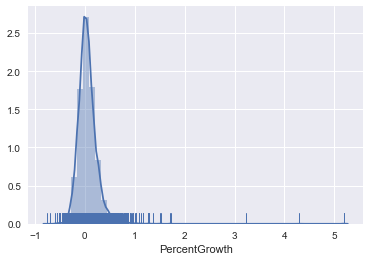

In [18]:
#are growth rates normally distributed??
sns.distplot(df_tiny['PercentGrowth'],rug=True)
#might have to remove outliers in this bad boy. the american community survey cannot be trusted.

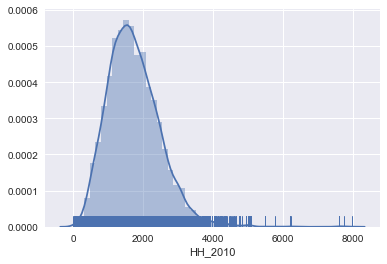

In [19]:
#and just curious about the number of households in each census tract
sns.distplot(df_tiny['HH_2010'].astype(int),rug=True)


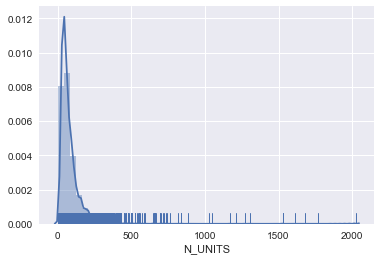

In [20]:
sns.distplot(df_tiny['N_UNITS'].astype(int),rug=True)
#realistically I dont think a property could have <5 units. I'll filter these out later.

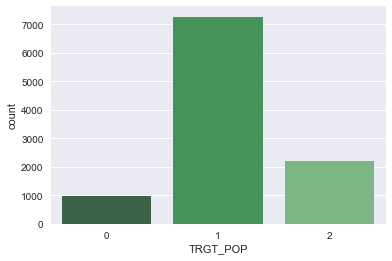

In [21]:
#TRGT popluation is basically looking at "does the property look at special needs popualtions (elderly, homeless), or is it general population?
#Targets a specific population with specialized services or facilities
#1=Yes 2=No
sns.countplot(x="TRGT_POP", data=df_tiny, palette="Greens_d")

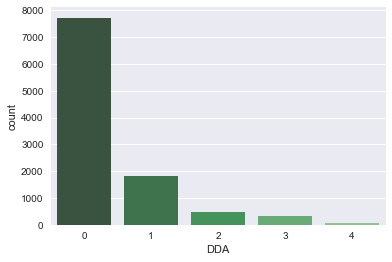

In [22]:
#DDA - is this project in a DDA, meaning census tract with higher poverty rates....very interesting paramater...
#0=Not in DDA 1=In Metro DDA 2=In Non-Metro DDA 3=In Metro GO Zone DDA 4=In Non-Metro GO Zone DDA
sns.countplot(x="DDA", data=df_tiny, palette="Greens_d")

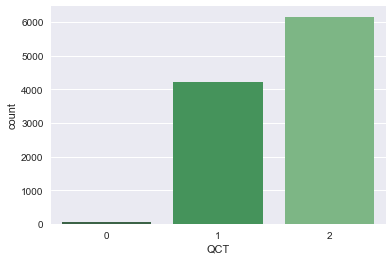

In [23]:
#Qualifed Census Tract
#1=In a qualified tract 2=Not in a qualified tract
#(For projects placed in service prior to 2003, QCT is based on 1990 Census tract. For projects placed in service since 2003, QCT is based on 2000 Census tract.)
sns.countplot(x="QCT", data=df_tiny, palette="Greens_d")

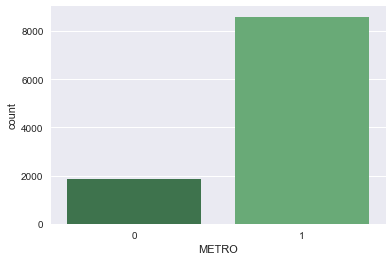

In [24]:
#Metro Area
#1=Metro SA/Non-Principal City 2=Metro SA/Principal City 3=Non-Metro SA
sns.countplot(x="METRO", data=df_tiny, palette="Greens_d")

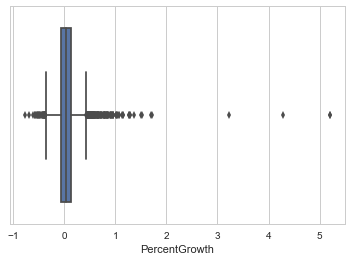

In [25]:
#boxplot for percent growth

sns.set_style("whitegrid")
ax = sns.boxplot(x=df_tiny["PercentGrowth"])
#this is a percent growth. so something like 3 = 300% growth. not really feasible. American community suvey data is notoriously unreliable.

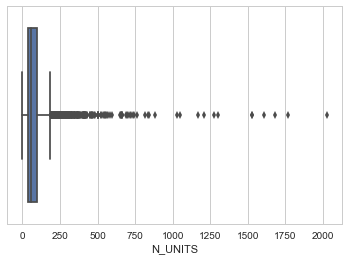

In [26]:
sns.set_style("whitegrid")
ax = sns.boxplot(x=df_tiny["N_UNITS"])
#anything above 500 units is probably a mistake in the data. 1700 units in an apartment building???

# Testing and Removing Outliers


In [27]:
import scipy.stats as stats
from scipy.stats import kstest, levene

print stats.normaltest(df_tiny['PercentGrowth'])
print kstest(df_tiny['PercentGrowth'], 'norm')

NormaltestResult(statistic=11998.529320499456, pvalue=0.0)
KstestResult(statistic=0.37671865653360009, pvalue=0.0)


These P-Values are not very good....

In [28]:
#Removing outliers on the percent growth column and the number of units column
#I could use std or another technique but I want to use my own understanding of the data to remove outliers.
df_tiny = df_tiny[(df_tiny.PercentGrowth < .5)]
df_tiny = df_tiny[(df_tiny.N_UNITS < 300)]
len(df_tiny)

10093

# Plotting Relationships
### Using Seaborn and lmplot

(0, 200)

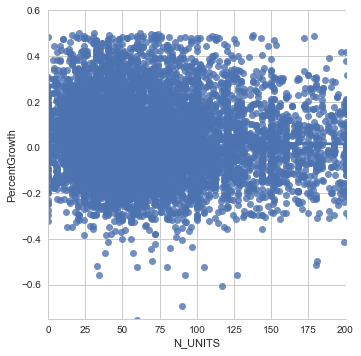

In [29]:
#the most crucial - are bigger builds affecting per capita growth
lm  = sns.lmplot(x="N_UNITS", y="PercentGrowth", order=2, data=df_tiny)
axes = lm.axes
axes[0,0].set_ylim(-0.75,.6)
axes[0,0].set_xlim(0,200)

(0, 200)

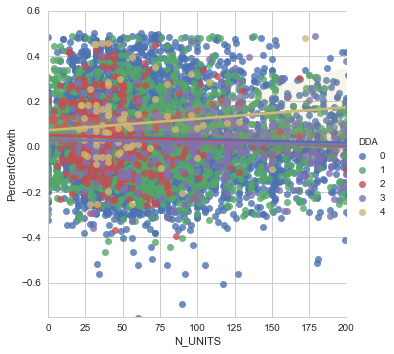

In [30]:
#plotting the DDA against number of units
#0=Not in DDA 1=In Metro DDA 2=In Non-Metro DDA 3=In Metro GO Zone DDA 4=In Non-Metro GO Zone DDA
lm  = sns.lmplot(x="N_UNITS", y="PercentGrowth", order=1, data=df_tiny,hue='DDA')
axes = lm.axes
axes[0,0].set_ylim(-0.75,.6)
axes[0,0].set_xlim(0,200)

(0, 200)

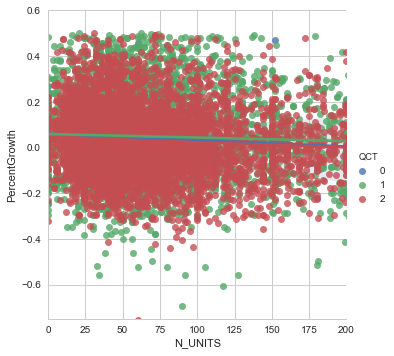

In [31]:
#plotting the QCT against number of units
#1=In a qualified tract 2=Not in a qualified tract
lm  = sns.lmplot(x="N_UNITS", y="PercentGrowth", order=1, data=df_tiny,hue='QCT')
axes = lm.axes
axes[0,0].set_ylim(-0.75,.6)
axes[0,0].set_xlim(0,200)

(0, 200)

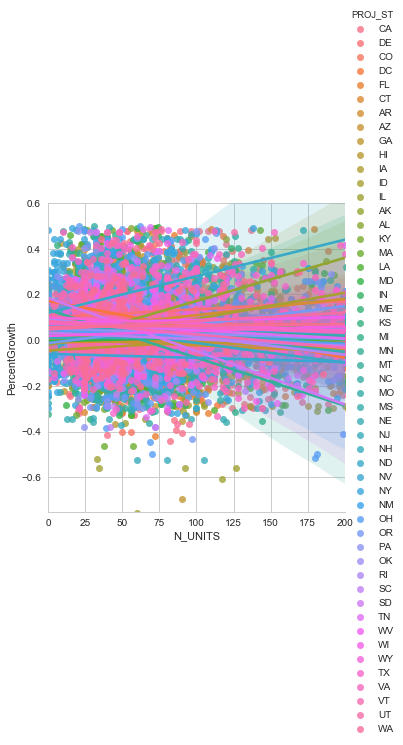

In [32]:
#number of units against growth by target population
lm  = sns.lmplot(x="N_UNITS", y="PercentGrowth", order=1, data=df_tiny,hue='PROJ_ST',)
axes = lm.axes
axes[0,0].set_ylim(-0.75,.6)
axes[0,0].set_xlim(0,200)
#this is crazy, not much help

(0, 200)

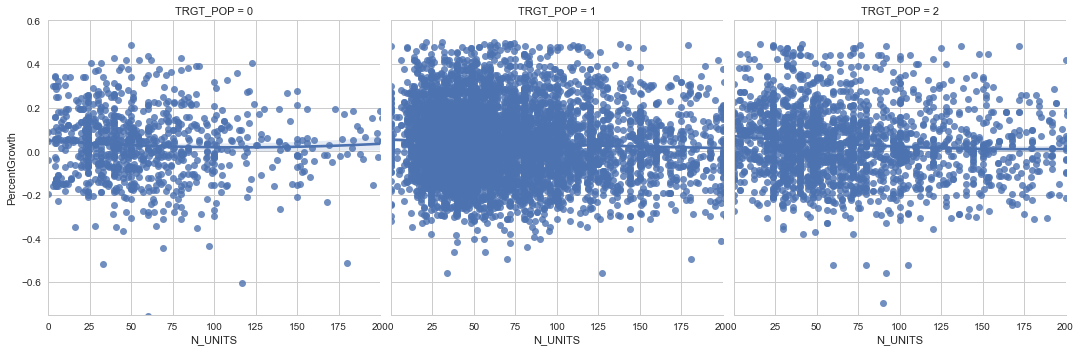

In [33]:
#number of units against growth by target population
lm  = sns.lmplot(x="N_UNITS", y="PercentGrowth", order=2, data=df_tiny,col='TRGT_POP',)
axes = lm.axes
axes[0,0].set_ylim(-0.75,.6)
axes[0,0].set_xlim(0,200)

(0, 200)

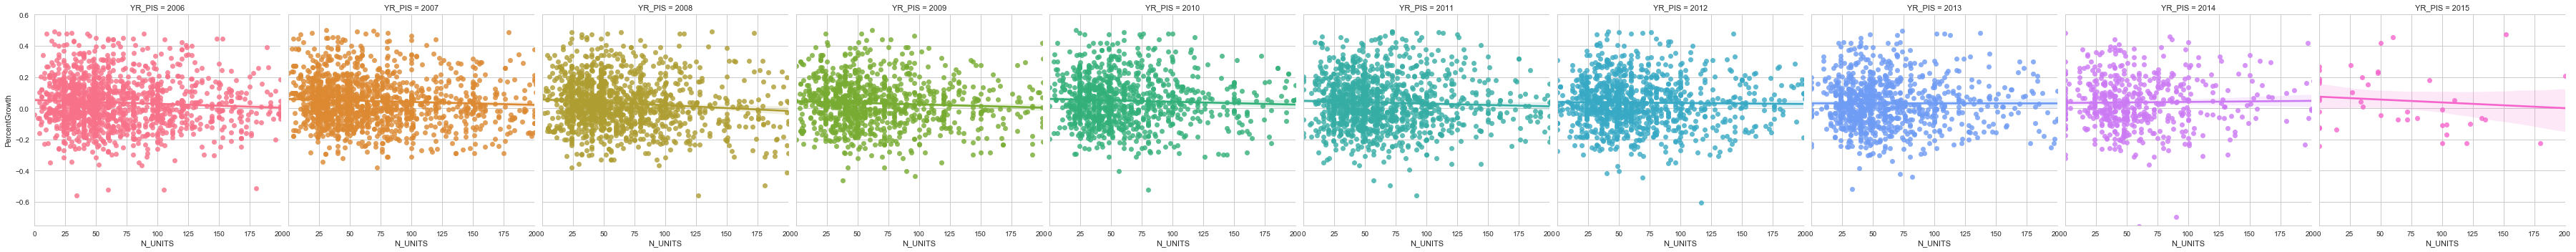

In [34]:
#number of units against growth by sorted by Year PIS. sorta cool (right click and say "view image in new tab")
lm  = sns.lmplot(x="N_UNITS", y="PercentGrowth", order=1, data=df_tiny,col='YR_PIS',hue='YR_PIS')

axes = lm.axes
axes[0,0].set_ylim(-0.75,.6)
axes[0,0].set_xlim(0,200)

(2005, 2016)

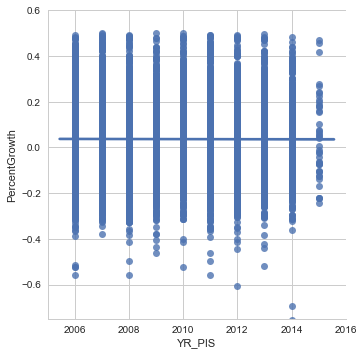

In [35]:
#plot year placed in service. not much correlation
lm2  = sns.lmplot(x="YR_PIS", y="PercentGrowth", order=1, data=df_tiny,)

axes = lm2.axes
axes[0,0].set_ylim(-0.75,.6)
axes[0,0].set_xlim(2005,2016)


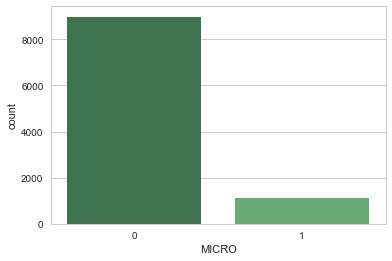

In [36]:
sns.countplot(x="MICRO", data=df_tiny, palette="Greens_d")

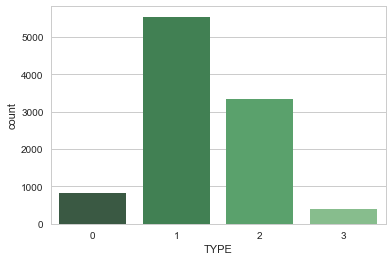

In [37]:
sns.countplot(x="TYPE", data=df_tiny, palette="Greens_d")

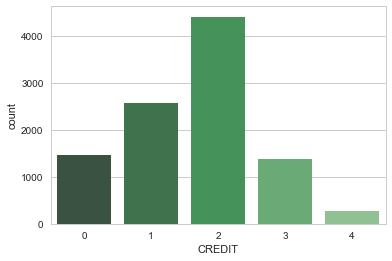

In [38]:

sns.countplot(x="CREDIT", data=df_tiny, palette="Greens_d")

# Correlation Time

,N_UNITS,CREDIT,10_14_Growth,METRO,MICRO,DDA,QCT,HH_2010,PercentGrowth
N_UNITS,1.000000,-0.158650,-0.056622,0.248354,-0.156331,0.057506,-0.048088,0.021259,-0.062094
CREDIT,-0.158650,1.000000,0.033181,-0.117607,0.085877,-0.005286,0.000787,-0.027402,0.038893
10_14_Growth,-0.056622,0.033181,1.000000,-0.061998,0.042943,-0.013900,0.004992,0.058487,0.914375
METRO,0.248354,-0.117607,-0.061998,1.000000,-0.751229,-0.103763,-0.168172,-0.051842,-0.071086
MICRO,-0.156331,0.085877,0.042943,-0.751229,1.000000,0.095256,0.114755,0.057612,0.045998
DDA,0.057506,-0.005286,-0.013900,-0.103763,0.095256,1.000000,-0.022635,0.032053,-0.005545
QCT,-0.048088,0.000787,0.004992,-0.168172,0.114755,-0.022635,1.000000,0.345634,-0.054650
HH_2010,0.021259,-0.027402,0.058487,-0.051842,0.057612,0.032053,0.345634,1.000000,-0.001548
PercentGrowth,-0.062094,0.038893,0.914375,-0.071086,0.045998,-0.005545,-0.054650,-0.001548,1.000000


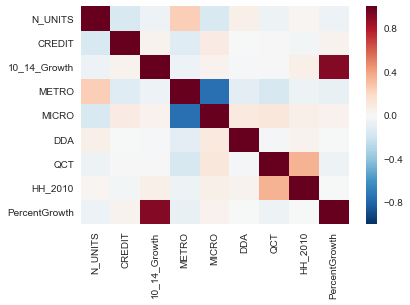

In [39]:
corr = df_tiny[['N_UNITS','CREDIT','10_14_Growth','METRO','MICRO','DDA','QCT','HH_2010','PercentGrowth']].corr()
sns.heatmap(corr)
corr

# What Have I learned?
1. Geting rid of bad values, dropping nulls, and shrinking the data based on "placed in service date" is valuable and makes it easier to wrangle.
2. I could have dropped outliers using a STD, but I think it's more important to slice off data based on what I already understand (there are no building iwth 1000+ units, there are no census tracts that have 200% income growth, ect)
3. The API takes a LONG time to calculate. Saving to the CSV is the way to go.
4. Nothing really jumping out at me in the correlation matrix.
5. QCT and DDA look like real indicators! Meaning, growth rates are probably low in areas that are already qualified by HUD as "Difficult Devleopment Areas" or "Qualified Census Tracts".
6. Per Shaq's request, an SGD method is probably best, since I have a lot of data. Looking forward to trying it.
7. This may require polynomials to best fit..
8. Many census tracts have 2,3, or 4 projects in them. I should maybe combine these census tracts and combine the total number of units for a better analysis.

### Hypothesis
It seems like there is a slight correlation between the number of units and the percent growth rates. It may depend on the state and if the project is in a Difficult development area or qct. I may have to combine and sum the census tracts that have multiple projects in them, to simplify. 

It's a lot of data to handle, so may have to hone it even further - just looking at projects in one particular year. Maybe only the ones place in service in 2010. The qualified census tracts, and the difficult devlopment area variables are aslo useful. I should make those into dummy variables when I input into the SGD algorithm.

10093
10093


ValueError: could not convert string to float: N_UNITS

In [59]:
#webscrap from the census bureau American FactFinder
mytoken = "9bd9fa373d767eaa91be6a4c2643abbd38f3049e"
#census_id is the census data variable. see here for a list of census variables.
# https://api.census.gov/data/2010/acs5/variables.html . pretty cool!

#my API call function. 
def ACS_data_states(year,census_id, state):
    try:
        #time.sleep(.1) #seems like i don't have to sleep but just in case
        url = 'http://api.census.gov/data/' + str(year) + '/acs5?get=' + census_id + '&for=state:' + str(state) +'&key=' + mytoken
        #https://api.census.gov/data/2010/acs5?get=B06011_001E&for=state:01
        response = requests.get(url)
        print time.ctime()
        #count + 1
        #returns the median income we want!
        return response.json()[1][0]
        #print type(response.json())
    except:
        return np.nan

In [52]:
df_states = pd.read_excel("States.xlsx")

In [55]:
df_states["ID_Code"] = df_states.Code.map("{:02}".format)

In [57]:
df_states.head(10)

,Code,State Code,State,Abbrev,ID_Code
0,1,1,Alabama,AL,01
1,2,2,Alaska,AK,02
2,4,4,Arizona,AZ,04
3,5,5,Arkansas,AR,05
4,6,6,California,CA,06
5,8,8,Colorado,CO,08
6,9,9,Connecticut,CT,09
7,10,10,Delaware,DE,10
8,11,11,District of Columbia,DC,11
9,12,12,Florida,FL,12


In [62]:
df_states['MHI_2010'] = df_states.apply(lambda x: ACS_data_states('2010','B06011_001E',x['ID_Code']), axis=1)
df_states['MHI_2011'] = df_states.apply(lambda x: ACS_data_states('2011','B06011_001E',x['ID_Code']), axis=1)
df_states['MHI_2012'] = df_states.apply(lambda x: ACS_data_states('2012','B06011_001E',x['ID_Code']), axis=1)
df_states['MHI_2013'] = df_states.apply(lambda x: ACS_data_states('2013','B06011_001E',x['ID_Code']), axis=1)
df_states['MHI_2014'] = df_states.apply(lambda x: ACS_data_states('2014','B06011_001E',x['ID_Code']), axis=1)
df_states['MHI_2015'] = df_states.apply(lambda x: ACS_data_states('2015','B06011_001E',x['ID_Code']), axis=1)
print "**********COMPLETED AND FINALIZED************"

Tue May 02 10:39:12 2017
Tue May 02 10:39:12 2017
Tue May 02 10:39:13 2017
Tue May 02 10:39:13 2017
Tue May 02 10:39:13 2017
Tue May 02 10:39:14 2017
Tue May 02 10:39:14 2017
Tue May 02 10:39:14 2017
Tue May 02 10:39:15 2017
Tue May 02 10:39:15 2017
Tue May 02 10:39:15 2017
Tue May 02 10:39:16 2017
Tue May 02 10:39:16 2017
Tue May 02 10:39:16 2017
Tue May 02 10:39:16 2017
Tue May 02 10:39:17 2017
Tue May 02 10:39:17 2017
Tue May 02 10:39:17 2017
Tue May 02 10:39:18 2017
Tue May 02 10:39:18 2017
Tue May 02 10:39:18 2017
Tue May 02 10:39:19 2017
Tue May 02 10:39:19 2017
Tue May 02 10:39:19 2017
Tue May 02 10:39:19 2017
Tue May 02 10:39:20 2017
Tue May 02 10:39:20 2017
Tue May 02 10:39:20 2017
Tue May 02 10:39:21 2017
Tue May 02 10:39:21 2017
Tue May 02 10:39:21 2017
Tue May 02 10:39:22 2017
Tue May 02 10:39:22 2017
Tue May 02 10:39:22 2017
Tue May 02 10:39:22 2017
Tue May 02 10:39:23 2017
Tue May 02 10:39:23 2017
Tue May 02 10:39:23 2017
Tue May 02 10:39:24 2017
Tue May 02 10:39:24 2017


In [63]:
df_states

,Code,State Code,State,Abbrev,ID_Code,MHI_2010,MHI_2011,MHI_2012,MHI_2013,MHI_2014,MHI_2015
0,1,1,Alabama,AL,01,21746,22217,22318,22394,22626,22890
1,2,2,Alaska,AK,02,29509,30604,31005,30947,31441,31455
2,4,4,Arizona,AZ,04,26412,26611,26388,26073,26110,26156
3,5,5,Arkansas,AR,05,20881,21356,21604,21771,22067,22205
4,6,6,California,CA,06,27207,27355,27129,26893,26932,27035
5,8,8,Colorado,CO,08,29365,29921,30084,30141,30393,30752
6,9,9,Connecticut,CT,09,32258,32910,32842,32651,33009,33226
7,10,10,Delaware,DE,10,29205,29975,29752,29699,30062,30329
8,11,11,District of Columbia,DC,11,35264,37217,38230,39158,40381,40884
9,12,12,Florida,FL,12,24812,25014,24683,24344,24501,24654


In [68]:
df_states = df_states.drop(df_states[(df_states.Abbrev == 'PR')].index)
df_states['10_14_Growth'] = df_states['MHI_2014'].astype(int) - df_states['MHI_2010'].astype(int)
df_states['PercentGrowth'] = (df_states['MHI_2014'].astype(int) - df_states['MHI_2010'].astype(int)) / df_states['MHI_2010'].astype(int)
df_states.head(10)

,Code,State Code,State,Abbrev,ID_Code,MHI_2010,MHI_2011,MHI_2012,MHI_2013,MHI_2014,MHI_2015,10_14_Growth,PercentGrowth
0,1,1,Alabama,AL,01,21746,22217,22318,22394,22626,22890,880,0.040467
1,2,2,Alaska,AK,02,29509,30604,31005,30947,31441,31455,1932,0.065472
2,4,4,Arizona,AZ,04,26412,26611,26388,26073,26110,26156,-302,-0.011434
3,5,5,Arkansas,AR,05,20881,21356,21604,21771,22067,22205,1186,0.056798
4,6,6,California,CA,06,27207,27355,27129,26893,26932,27035,-275,-0.010108
5,8,8,Colorado,CO,08,29365,29921,30084,30141,30393,30752,1028,0.035008
6,9,9,Connecticut,CT,09,32258,32910,32842,32651,33009,33226,751,0.023281
7,10,10,Delaware,DE,10,29205,29975,29752,29699,30062,30329,857,0.029344
8,11,11,District of Columbia,DC,11,35264,37217,38230,39158,40381,40884,5117,0.145105
9,12,12,Florida,FL,12,24812,25014,24683,24344,24501,24654,-311,-0.012534


In [69]:
df_states.to_csv("C:\Users\Dave\Documents\GitHub\LIHTC-Project-Distribution\States_with_Income.csv")